In [17]:
import os
import random

def generate_text_file(file_path, size_kb):
  for i in range(10):
    file_name = f"{file_path}{size_kb[i]}KB.txt"
    content = f"{''.join(chr(random.randint(32,126)) for i in range(size_kb[i] * 1024))}"
    with open(file_name, "w+") as f:
      f.write(content)

def generate_binary_file(file_path, size_kb):
  for i in range(10):
    file_name = f"{file_path}{size_kb[i]}KB.bin"
    content = os.urandom(size_kb[i] * 1024)
    with open(file_name, "wb") as f:
      f.write(content)

if __name__ == '__main__':
  file_path = ["text_file_", "binary_file_"]
  size_kb = []

  for i in range(10):
    size_kb.append(2**(i+1))
  
  generate_text_file(file_path[0], size_kb)
  generate_binary_file(file_path[1], size_kb)

In [18]:
import time
import gzip
import bz2

def compress_file_gzip(input, output):
    start = time.perf_counter()
    with open(input, "rb") as f_in:
        with gzip.open(output, "wb") as f_out:
            f_out.write(f_in.read())
    end = time.perf_counter()
    execution_time = end - start
    return execution_time*1e3

def decompress_file_gzip(input, output):
    start = time.perf_counter()
    with gzip.open(input, "rb") as f_in:
        with open(output, "wb") as f_out:
            f_out.write(f_in.read())
    end = time.perf_counter()
    execution_time = end - start
    return execution_time*1e3

def compress_file_bz2(input, output):
    start = time.perf_counter()
    with open(input, "rb") as f_in:
        with bz2.open(output, "wb") as f_out:
            f_out.write(f_in.read())
    end = time.perf_counter()
    execution_time = end - start
    return execution_time*1e3

def decompress_file_bz2(input, output):
    start = time.perf_counter()
    with bz2.open(input, "rb") as f_in:
        with open(output, "wb") as f_out:
            f_out.write(f_in.read())
    end = time.perf_counter()
    execution_time = end - start
    return execution_time*1e3

In [19]:
txt_gzip_comp_time = []
txt_gzip_decomp_time = []
txt_bz2_comp_time = []
txt_bz2_decomp_time = []

bin_gzip_comp_time = []
bin_gzip_decomp_time = []
bin_bz2_comp_time = []
bin_bz2_decomp_time = []

for i in size_kb:
    txt_gzip_comp_time.append(compress_file_gzip(f"{file_path[0]}{i}KB.txt", f"{file_path[0]}{i}KB.txt.gz"))
    txt_gzip_decomp_time.append(decompress_file_gzip(f"{file_path[0]}{i}KB.txt.gz", f"gzip_decompressed_{file_path[0]}{i}KB.txt"))
    txt_bz2_comp_time.append(compress_file_bz2(f"{file_path[0]}{i}KB.txt", f"{file_path[0]}{i}KB.txt.bz2"))
    txt_bz2_decomp_time.append(decompress_file_bz2(f"{file_path[0]}{i}KB.txt.bz2", f"bz2_decompressed_{file_path[0]}{i}KB.txt"))

    bin_gzip_comp_time.append(compress_file_gzip(f"{file_path[1]}{i}KB.bin", f"{file_path[1]}{i}KB.bin.gz"))
    bin_gzip_decomp_time.append(decompress_file_gzip(f"{file_path[1]}{i}KB.bin.gz", f"gzip_decompressed_{file_path[1]}{i}KB.bin"))
    bin_bz2_comp_time.append(compress_file_bz2(f"{file_path[1]}{i}KB.bin", f"{file_path[1]}{i}KB.bin.bz2"))
    bin_bz2_decomp_time.append(decompress_file_bz2(f"{file_path[1]}{i}KB.bin.bz2", f"bz2_decompressed_{file_path[1]}{i}KB.bin"))

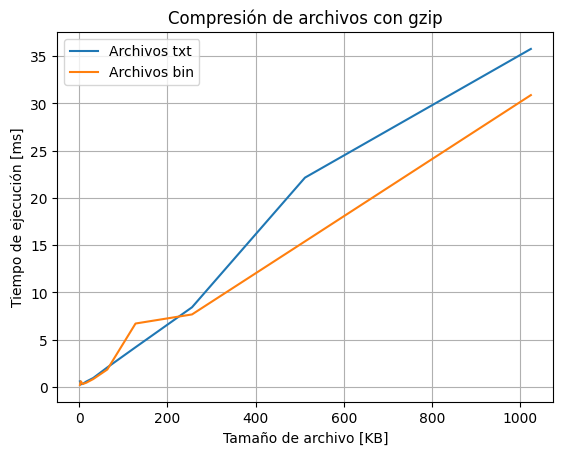

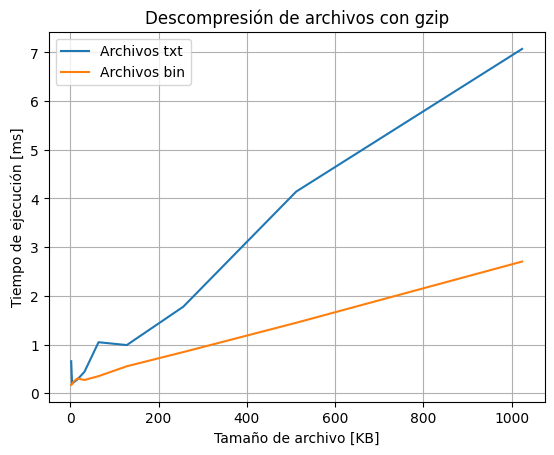

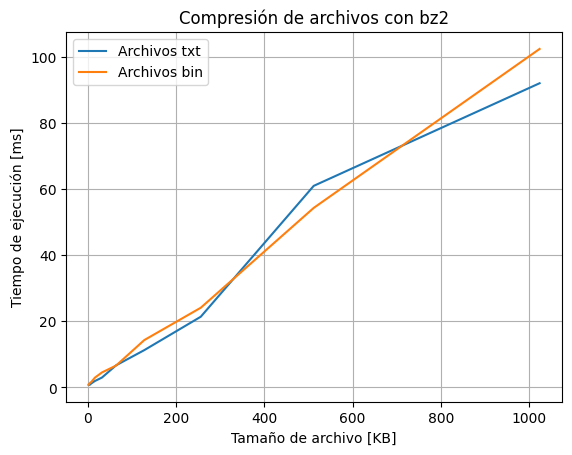

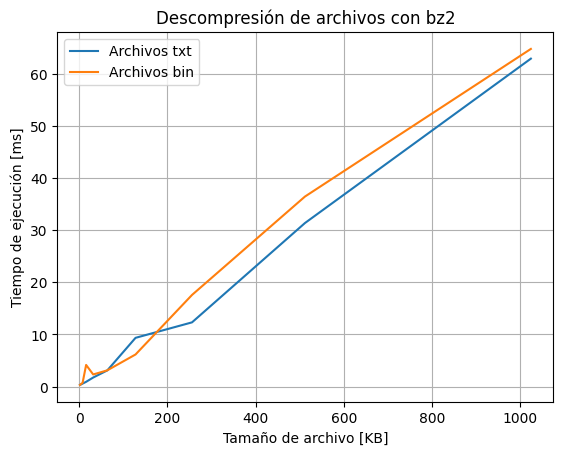

In [20]:
import matplotlib.pyplot as plt

plt.plot(size_kb, txt_gzip_comp_time, label = 'Archivos txt')
plt.plot(size_kb, bin_gzip_comp_time, label = 'Archivos bin')
plt.grid()
plt.xlabel("Tamaño de archivo [KB]")
plt.ylabel("Tiempo de ejecución [ms]")
plt.legend()
plt.title("Compresión de archivos con gzip")
plt.show()
plt.close()

plt.plot(size_kb, txt_gzip_decomp_time, label = 'Archivos txt')
plt.plot(size_kb, bin_gzip_decomp_time, label = 'Archivos bin')
plt.grid()
plt.xlabel("Tamaño de archivo [KB]")
plt.ylabel("Tiempo de ejecución [ms]")
plt.legend()
plt.title("Descompresión de archivos con gzip")
plt.show()
plt.close()

plt.plot(size_kb, txt_bz2_comp_time, label = 'Archivos txt')
plt.plot(size_kb, bin_bz2_comp_time, label = 'Archivos bin')
plt.grid()
plt.xlabel("Tamaño de archivo [KB]")
plt.ylabel("Tiempo de ejecución [ms]")
plt.legend()
plt.title("Compresión de archivos con bz2")
plt.show()
plt.close()

plt.plot(size_kb, txt_bz2_decomp_time, label = 'Archivos txt')
plt.plot(size_kb, bin_bz2_decomp_time, label = 'Archivos bin')
plt.grid()
plt.xlabel("Tamaño de archivo [KB]")
plt.ylabel("Tiempo de ejecución [ms]")
plt.legend()
plt.title("Descompresión de archivos con bz2")
plt.show()
plt.close()

P2

In [21]:
from random import randint

def simulate_sensor_data():
  temperatura = randint(2000,3000)/100
  humedad = randint(3000,7000)/100
  voltaje = randint(495,505)/100
  corriente = randint(1500,2000)/100
  data = f"{temperatura:.2f},{humedad:.2f},{voltaje:.2f},{corriente:.2f}"
  return data


In [22]:
from datetime import datetime

def log_data(file_path, N):
  contenido =  f"Timestamp,Temperatura,Humedad,Voltage,Corriente\n"

  for i in range(N):
    fila = f"{datetime.now()},{simulate_sensor_data()}\n"
    contenido += fila

  with open(f"{file_path}{N}.csv", "w+") as f:
    f.write(contenido)

log_data("sensor_log_", 10)

In [23]:
import time
from time import perf_counter
from datetime import datetime, timedelta 

def log_data_sync(file_path, N, Ts):

  time_list = []
  contenido = f"Timestamp, Temperatura, Humedad, Voltaje, Corriente\n"

  for i in range(N):
    start = perf_counter()
    fila = f"{datetime.now() + timedelta(seconds = Ts*i)},{simulate_sensor_data()}\n"
    contenido += fila
    end = perf_counter()
    time_list.append(end-start)

  with open(f"{file_path}{N}.csv", "w+") as f:
    f.write(contenido)

  return time_list

print(log_data_sync("sensor_log_sync_", 10, 1))

[4.1601999328122474e-05, 9.68000040302286e-06, 7.202000233519357e-06, 6.920000487298239e-06, 6.684000254608691e-06, 6.864999704703223e-06, 7.016999916231725e-06, 6.54399991617538e-06, 6.811999810452107e-06, 7.396000000881031e-06]


In [24]:
Ts = 5*(1e-3)
N = 1024, 2048, 4096, 8192
time_list = []
times_per_N = []

for tam in N:
    time_list = log_data_sync("sensor_log_sync_", tam, Ts)
    times_per_N.append(time_list)

print(times_per_N)

[[4.429699947650079e-05, 9.075999514607247e-06, 7.418999302899465e-06, 6.831000064266846e-06, 7.39799997973023e-06, 7.290999747056048e-06, 7.347999599005561e-06, 6.7470000431058e-06, 6.926000423845835e-06, 7.145999916247092e-06, 6.7219998527434655e-06, 6.707000466121826e-06, 6.621000466111582e-06, 6.608999683521688e-06, 6.666999979643151e-06, 7.2189995989901945e-06, 7.348000508500263e-06, 7.229999937408138e-06, 6.713000402669422e-06, 6.96500046615256e-06, 7.239000296976883e-06, 6.99500014889054e-06, 6.618000043090433e-06, 6.548999408551026e-06, 2.3225999939313624e-05, 1.0817999282153323e-05, 1.1395999536034651e-05, 1.1732000530173536e-05, 1.2220000826346222e-05, 1.4971000382502098e-05, 7.049000487313606e-06, 6.878999556647614e-06, 6.754000423825346e-06, 6.751000000804197e-06, 6.675000804534648e-06, 7.413999810523819e-06, 6.719999873894267e-06, 6.715000381518621e-06, 7.022000318102073e-06, 7.058999472064897e-06, 6.940999810467474e-06, 6.815999768150505e-06, 6.674999895039946e-06, 6.6299